<a href="https://colab.research.google.com/github/Koruvika/Koruvika.github.io/blob/master/Linear_Transformation_in_Real_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.style.use('seaborn')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Rotation

Rotation Matrix: $\begin{pmatrix}
cos(\alpha) & -sin(\alpha)\\
sin(\alpha) & cos(\alpha)
\end{pmatrix}$

### Demo

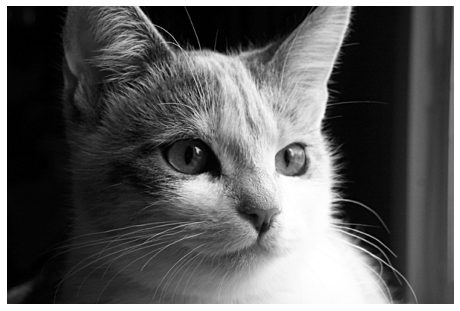

In [23]:
img = cv2.imread('./drive/MyDrive/ALAFF/grayscale_cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [44]:
def rotation_matrix(alpha): # degree
    gradient = alpha * np.pi/ 180
    return np.array([[np.cos(gradient), -np.sin(gradient)], [np.sin(gradient), np.cos(gradient)]])

In [53]:
rotation_matrix(400)
rotation_matrix(40)

array([[ 0.76604444, -0.64278761],
       [ 0.64278761,  0.76604444]])

In [29]:
img.shape

(400, 600)

In [100]:
def rotation_at_center(image, alpha):
    gradient = alpha * np.pi/ 180
    rotation_matrix = np.array([[np.cos(gradient), -np.sin(gradient)], [np.sin(gradient), np.cos(gradient)]])
    m, n = image.shape
    m_new = (np.abs(m * np.cos(gradient)) + np.abs(n * np.sin(gradient)) + 1).astype(np.int32)
    n_new = (np.abs(n * np.cos(gradient)) + np.abs(m * np.sin(gradient)) + 1).astype(np.int32)
    rotation_image = 255*np.ones(shape=(np.abs(m_new),np.abs(n_new)))

    for i in range(m):
        for j in range(n):
            coor = np.array([int(i - m/2),int(j - n/2)])

            rotation_coor = rotation_matrix @ coor
            rotation_coor[0] += (m_new/2)
            rotation_coor[1] += (n_new/2)
            rotation_coor = rotation_coor.astype(np.int32)
            rotation_image[rotation_coor[0]][rotation_coor[1]] = image[i][j]
    
    return rotation_image

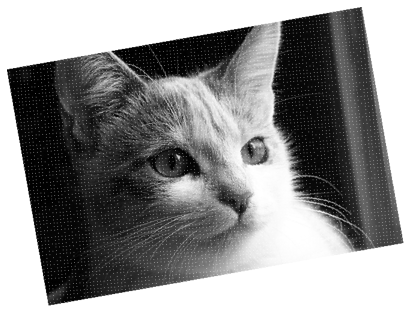

In [136]:
image = rotation_at_center(img, 10)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## Reflection

Reflection Matrix: $\begin{pmatrix}
cos(2\alpha) & sin(2\alpha)\\
sin(2\alpha) & -cos(2\alpha)
\end{pmatrix}$

### Demo

In [125]:
def reflection_at_center(image, alpha):
    gradient = alpha * np.pi/ 180
    reflection_matrix = np.array([[np.cos(2*gradient), np.sin(2*gradient)], [np.sin(2*gradient), -np.cos(2*gradient)]])
    m, n = image.shape
    m_new = (np.abs(m * np.cos(2*gradient)) + np.abs(n * np.sin(2*gradient)) + 1).astype(np.int32)
    n_new = (np.abs(n * np.cos(2*gradient)) + np.abs(m * np.sin(2*gradient)) + 1).astype(np.int32)
    reflection_image = 255*np.ones(shape=(np.abs(m_new),np.abs(n_new)))

    for i in range(m):
        for j in range(n):
            coor = np.array([int(i - m/2),int(j - n/2)])

            reflection_coor = reflection_matrix @ coor
            reflection_coor[0] += (m_new/2)
            reflection_coor[1] += (n_new/2)
            reflection_coor = reflection_coor.astype(np.int32)
            reflection_image[reflection_coor[0]][reflection_coor[1]] = image[i][j]
    
    return reflection_image

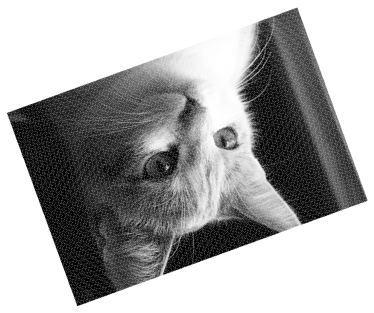

In [134]:
reflection_image = reflection_at_center(img, 100)
plt.imshow(reflection_image, cmap='gray')
plt.axis('off')
plt.show()
